# Disease Prediction: EDA to Model Optimization

Dataset Head:
   Gender  Age  Height(cm)  Weight(kg)        BP Cholesterol Allergies  \
0    Male   23         193          62  Elevated        High      Cats   
1  Female   58         155         118      High  Borderline       NaN   
2  Female   73         142          96      High        High    Pollen   
3  Female   73         142          96      High        High    Pollen   
4  Female   15         188          90  Elevated        High      Cats   

                      Disease  Chance (%)  \
0           Mixed Parkinson's        10.0   
1  Akinetic-Rigid Parkinson's        15.0   
2        Rheumatoid Arthritis         1.0   
3        Rheumatoid Arthritis         1.0   
4      Essential Hypertension        90.0   

                                            Symptoms  \
0  Combination of tremors, stiffness, and slow mo...   
1  Muscle rigidity, Lack of facial expression, Sl...   
2  Joint pain, Stiffness (morning), Swelling, Fat...   
3  Morning stiffness, Joint swelling, Fatigue,

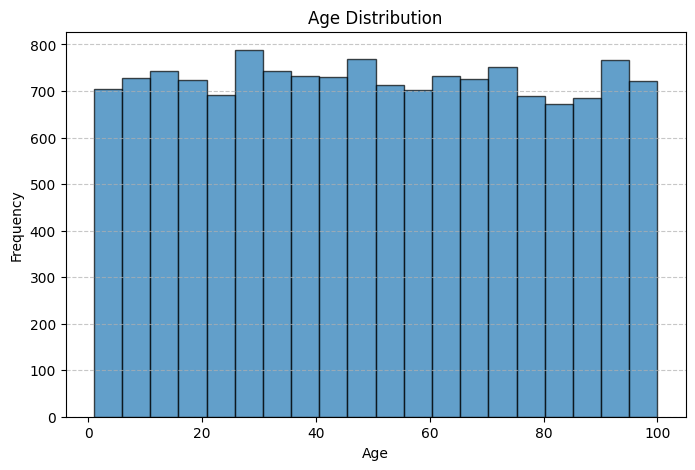

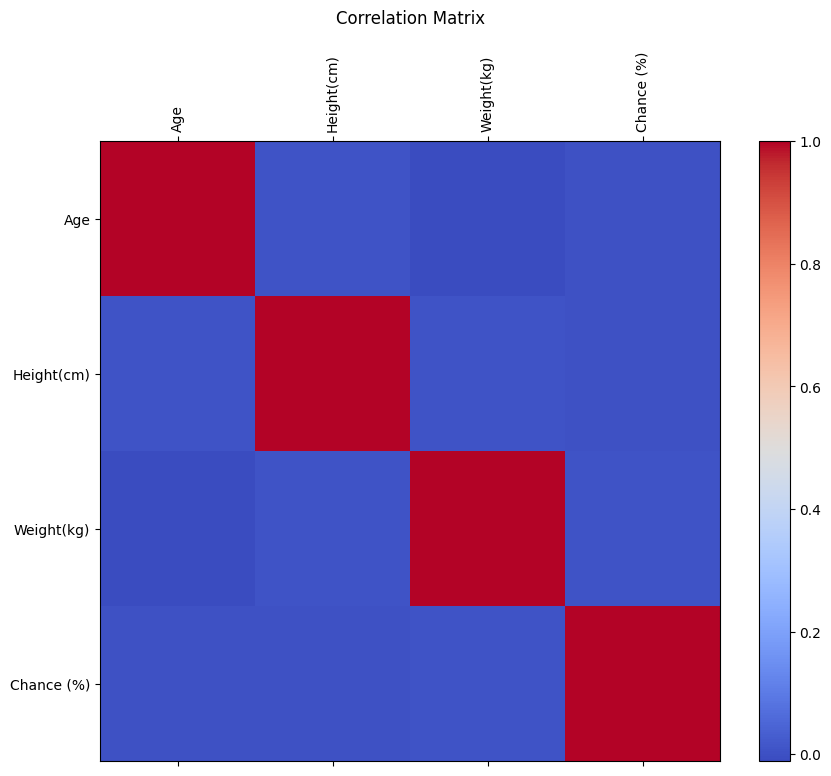

C:\Users\Gaurav Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Gaurav Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


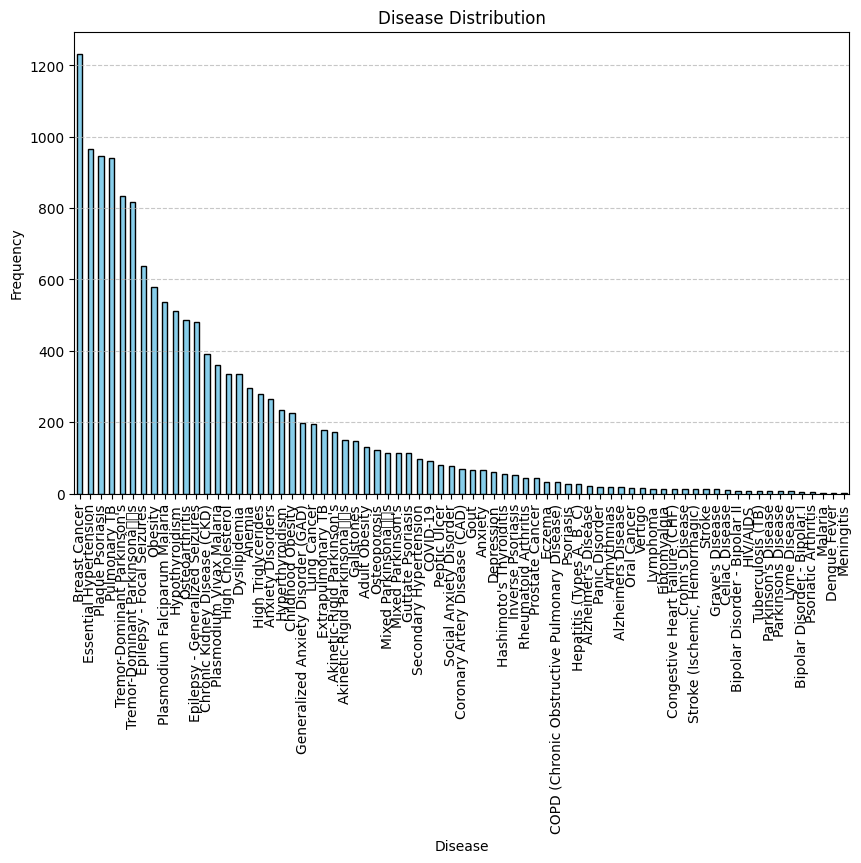

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Step 1: Load the Dataset
file_path = r"C:\Users\Gaurav Gupta\Downloads\Merged_Health_Dataset.csv"
data = pd.read_csv(file_path)

# Step 2: Exploratory Data Analysis (EDA)
print("Dataset Head:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nNumerical Summary:")
print(data.describe())

# Visualizing distribution of age
plt.figure(figsize=(8, 5))
plt.hist(data['Age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Filter the data to include only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.title("Correlation Matrix", pad=20)
plt.xticks(range(numerical_data.shape[1]), numerical_data.columns, rotation=90)
plt.yticks(range(numerical_data.shape[1]), numerical_data.columns)
plt.show()


# Visualizing Disease Distribution
plt.figure(figsize=(10, 6))
data['Disease'].value_counts().plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Disease Distribution')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [3]:

# Step 3: Preprocessing Data
label_encoders = {}
categorical_columns = data.select_dtypes(include='object').columns

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split features (X) and target variable (y)
X = data.drop(columns=['Disease'])
y = data['Disease']

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:

# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Build Initial Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate Initial Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Align classes for the classification report
unique_test_classes = sorted(y_test.unique())
target_names = label_encoders['Disease'].inverse_transform(unique_test_classes)
report = classification_report(y_test, y_pred, target_names=target_names)

print(f"Initial Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(report)


Initial Model Accuracy: 98.48%

Classification Report:
                                              precision    recall  f1-score   support

                               Adult Obesity       1.00      1.00      1.00        27
                  Akinetic-Rigid Parkinson's       0.64      0.51      0.57        41
                Akinetic-Rigid Parkinsonâs       0.46      0.59      0.52        29
                         Alzheimer's Disease       1.00      1.00      1.00         3
                          Alzheimers Disease       1.00      1.00      1.00         5
                                      Anemia       1.00      1.00      1.00        67
                                     Anxiety       0.50      0.17      0.25        12
                           Anxiety Disorders       0.86      0.97      0.91        63
                                 Arrhythmias       1.00      1.00      1.00         6
                Bipolar Disorder - Bipolar I       1.00      1.00      1.00         

In [5]:

# Step 6: Hyperparameter Optimization with Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Step 7: Evaluate the Optimized Model
y_pred_optimized = best_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)

print(f"Optimized Model Accuracy: {optimized_accuracy * 100:.2f}%")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized, target_names=target_names))


C:\Users\Gaurav Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Optimized Model Accuracy: 98.59%

Optimized Classification Report:
                                              precision    recall  f1-score   support

                               Adult Obesity       1.00      1.00      1.00        27
                  Akinetic-Rigid Parkinson's       0.70      0.56      0.62        41
                Akinetic-Rigid Parkinsonâs       0.51      0.66      0.58        29
                         Alzheimer's Disease       1.00      1.00      1.00         3
                          Alzheimers Disease       1.00      1.00      1.00         5
                                      Anemia       1.00      1.00      1.00        67
                                     Anxiety       0.33      0.08      0.13        12
                           Anxiety Disorders       0.85      0.97      0.90        63
                                 Arrhythmias       1.00      1.00      1.00         6
                Bipolar Disorder - Bipolar I       1.00      1.00      1

In [8]:
# Align predict_proba with all unique classes in y_test
classes_in_test = sorted(y_test.unique())
classes_in_model = best_model.classes_

# Create a zero matrix for all possible classes
y_score = np.zeros((X_test.shape[0], len(classes_in_test)))

# Populate the matrix with probabilities for classes present in the model
for i, class_label in enumerate(classes_in_test):
    if class_label in classes_in_model:
        idx = list(classes_in_model).index(class_label)
        y_score[:, i] = best_model.predict_proba(X_test)[:, idx]

# Normalize the rows to ensure they sum to 1
row_sums = y_score.sum(axis=1, keepdims=True)
row_sums[row_sums == 0] = 1  # Avoid division by zero for rows with all zeros
y_score /= row_sums

# Compute ROC-AUC
if len(classes_in_test) == 2:  # Binary classification
    roc_auc = roc_auc_score(y_test, y_score[:, 1])
    print(f"ROC-AUC Score: {roc_auc:.2f}")
else:  # Multiclass classification
    roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
    print(f"Multiclass ROC-AUC Score: {roc_auc:.2f}")


Multiclass ROC-AUC Score: 1.00
